In [1]:
%pylab inline --no-import-all
from scipy.stats import chi2, norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
xmin=-5
xmax=5
reals = np.linspace(xmin,xmax,100)

In [3]:
def f1(x):
    return np.exp(-0.5*(x)**2)/np.sqrt(2*np.pi) 
    
def f2(x):
    return np.exp(-x)/(np.exp(-xmin)-np.exp(-xmax))

dists = [f1,f2]

In [4]:
q = lambda h: (lambda x: np.sqrt(h(x)))

In [5]:
def inner_product(q1,q2, xmin=xmin, xmax=xmax):
    # this is a simple numeric integration
    num = 50000.
    xarray = np.linspace(xmin,xmax,num)
    return np.sum(q1(xarray) * q2(xarray),dtype=np.double)*(xmax-xmin)/num

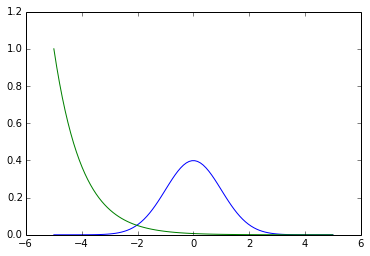

In [6]:
plt.plot(reals,dists[0](reals))
plt.plot(reals,dists[1](reals))

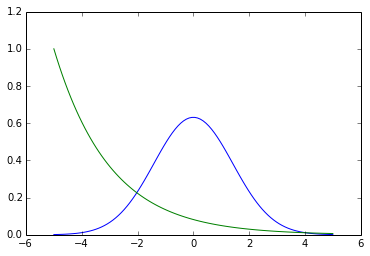

In [7]:
plt.plot(reals,q(dists[0])(reals))
plt.plot(reals,q(dists[1])(reals))

In [8]:
t = 0*np.arccos(inner_product(q(dists[0]),q(dists[1])))

In [9]:
dot01 = inner_product(q(dists[0]),q(dists[1]))
t1 = lambda x: q(dists[1])(x) - dot01*q(dists[0])(x)
norm1 = inner_product(t1,t1)
u1 = lambda x: t1(x)/np.sqrt(norm1)
#unnorm_tan = lambda x: u1(x)*normedBaryCoords[0]+u2(x)*normedBaryCoords[1]
#norm_tan = inner_product(unnorm_tan,unnorm_tan)
#tangent = lambda x: unnorm_tan(x) / np.sqrt(norm_tan)
tangent = u1
print 'test', inner_product(q(dists[0]),tangent), inner_product(tangent,tangent)
q_interpolant = lambda x: np.cos(t)*q(dists[0])(x) + np.sin(t)*tangent(x) 
interpolant = lambda x: ( np.cos(t)*q(dists[0])(x) + np.sin(t)*tangent(x) )**2
np.arccos(inner_product(q(interpolant),q(dists[0]))),inner_product(q(interpolant),q(interpolant))

test 4.98355890935e-06 1.0


(0.0064145249130260727, 0.99997942700561182)

In [10]:
inner_product(q(dists[0]),q(dists[0])), inner_product(q(dists[1]),q(dists[1])), np.arccos(dot01)

(0.99997942700561182, 1.0000800124137632, 1.3331268554450413)

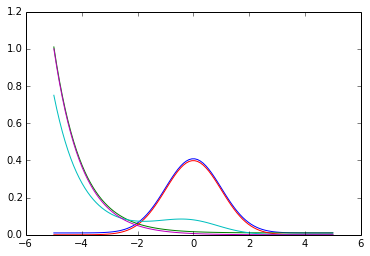

In [88]:
plt.plot(reals,.01+dists[0](reals))
plt.plot(reals,.01+dists[1](reals))
t = 0*np.arccos(inner_product(q(dists[0]),q(dists[1])))
plt.plot(reals,interpolant(reals))
t = 0.75*np.arccos(inner_product(q(dists[0]),q(dists[1])))
plt.plot(reals,interpolant(reals))
t = 1*np.arccos(inner_product(q(dists[0]),q(dists[1])))
plt.plot(reals,interpolant(reals))

0.10011127257427471

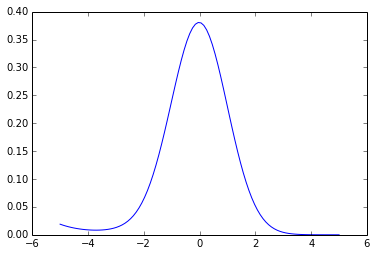

In [89]:
t = .1*np.arccos(inner_product(q(dists[0]),q(dists[1])))
plt.plot(reals,interpolant(reals))
np.arccos(inner_product(q(interpolant),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))

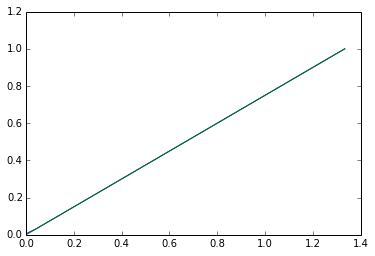

In [90]:
distarray = np.zeros(30)
tarray = np.linspace(0,np.arccos(inner_product(q(dists[0]),q(dists[1]))),30)
for i,tt in  enumerate(tarray):
    t=tt
    distarray[i] = np.arccos(inner_product(q(interpolant),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))
plt.plot(tarray,distarray)
plt.plot([0,np.arccos(inner_product(q(dists[0]),q(dists[1])))],[0,1])

In [91]:
mixture = lambda x: (1-tmix)*dists[0](x) + (tmix)*dists[1](x) 
unnormcox = lambda x: dists[0](x)**(1-tcox) * dists[1](x)**tcox
cox = lambda x: unnormcox(x)/inner_product(q(unnormcox),q(unnormcox))

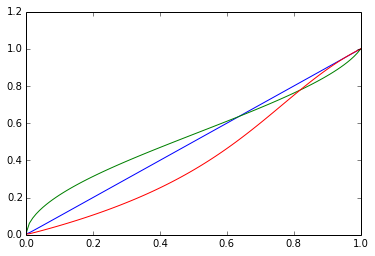

In [92]:
ntsteps=100
interpolant_distarray = np.zeros(ntsteps)
mixture_distarray = np.zeros(ntsteps)
cox_distarray = np.zeros(ntsteps)

tarray = np.linspace(0,1,ntsteps)
for i,tt in  enumerate(tarray):
    t=tt*np.arccos(inner_product(q(dists[0]),q(dists[1])))
    interpolant_distarray[i] = np.arccos(inner_product(q(interpolant),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tmix = tt
    mixture_distarray[i] = np.arccos(inner_product(q(mixture),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tcox = tt
    cox_distarray[i] = np.arccos(inner_product(q(cox),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))

plt.plot(tarray,interpolant_distarray)
plt.plot(tarray,mixture_distarray)
plt.plot(tarray,cox_distarray)

In [93]:
def eta_cox(tt):
    return tarray[np.argmax(cox_distarray>tt)]
def eta_mixture(tt):
    return tarray[np.argmax(mixture_distarray>tt)]

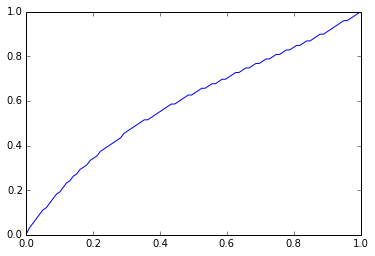

In [94]:
temp = np.zeros(ntsteps)
for i, tt in enumerate(tarray):
    temp[i]=eta_cox(tt)
plt.plot(tarray,temp)

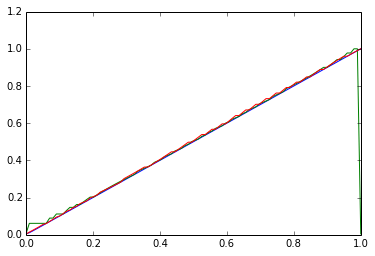

In [95]:
interpolant_etaarray = np.zeros(ntsteps)
cox_etaarray = np.zeros(ntsteps)
mixture_etaarray = np.zeros(ntsteps)

for i,tt in  enumerate(tarray):
    t=tt*np.arccos(inner_product(q(dists[0]),q(dists[1])))
    interpolant_etaarray[i] = np.arccos(inner_product(q(interpolant),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tmix = eta_mixture(tt)
    mixture_etaarray[i] = np.arccos(inner_product(q(mixture),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tcox = eta_cox(tt)
    cox_etaarray[i] = np.arccos(inner_product(q(cox),q(dists[0])))/np.arccos(inner_product(q(dists[0]),q(dists[1])))

plt.plot(tarray,interpolant_etaarray)
plt.plot(tarray,mixture_etaarray)
plt.plot(tarray,cox_etaarray)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in arccos


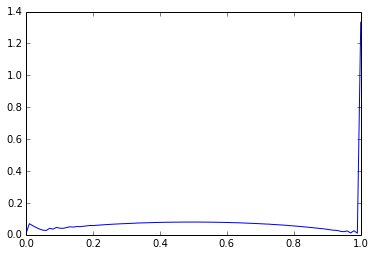

In [96]:
cox_interp_dist = np.zeros(ntsteps)
mixture_interp_dist = np.zeros(ntsteps)

for i,tt in  enumerate(tarray):
    t=tt*np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tmix = eta_mixture(tt)
    tcox = eta_cox(tt)
    cox_interp_dist[i] = np.arccos(inner_product(q(interpolant),q(cox)))
    mixture_interp_dist[i] = np.arccos(inner_product(q(interpolant),q(mixture)))

plt.plot(tarray,mixture_interp_dist)
#plt.plot(tarray,cox_interp_dist)

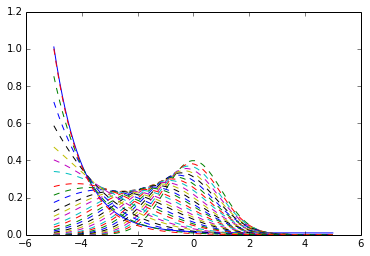

In [97]:
plt.plot(reals,dists[1](reals)+.01,ls='solid')
for i,tt in  enumerate(np.linspace(0,1,30)):
    t=tt*np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tmix = eta_mixture(tt)
    tcox = eta_cox(tt)
    #plt.plot(reals,mixture(reals))
    #plt.plot(reals,interpolant(reals), ls='dotted')
    plt.plot(reals,cox(reals),ls='dashed')

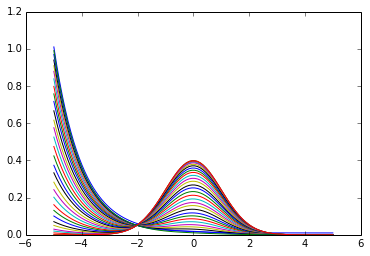

In [98]:
plt.plot(reals,dists[1](reals)+.01,ls='solid')
for i,tt in  enumerate(np.linspace(0,1,30)):
    t=tt*np.arccos(inner_product(q(dists[0]),q(dists[1])))
    tmix = eta_mixture(tt)
    tcox = eta_cox(tt)
    plt.plot(reals,mixture(reals))
    #plt.plot(reals,interpolant(reals), ls='dotted')
    #plt.plot(reals,cox(reals),ls='dashed')

def dbydt(q1, tarray, xmin=xmin, xmax=xmax):
    # this is a simple numeric integration
    num = 50000.
    xarray = np.linspace(xmin,xmax,num)
    temp = np.zeros(tarray.size)
    counter = 0
    for t1, t2 in zip(tarray, np.roll(tarray,1)):
        t,tcox,tmix=t1,t1,t1
        q1array = q1(xarray)
        t,tcox,tmix=t2,t2,t2
        q2array = q1(xarray)
        temp[counter] = np.sum(q1array * q2array,dtype=np.double)*(xmax-xmin)/num
        counter+=1
    return temp

In [99]:
# this is a simple numeric integration
num = 50000.
xarray = np.linspace(xmin,xmax,num)
mixture_velocity = np.zeros(tarray.size)
cox_velocity = np.zeros(tarray.size)
interpolant_velocity = np.zeros(tarray.size)
counter = 0
for tt, ttt in zip(tarray, np.roll(tarray,1)):
    t,tcox,tmix=tt,tt,tt
    #q1array = q(cox)(xarray)
    q1array = np.sqrt(cox(xarray))
    t,tcox,tmix=ttt,ttt,ttt
    #q2array = q(cox)(xarray)
    q2array = np.sqrt(cox(xarray))
    #print np.sum(q1array-q2array), 'test'
    cox_velocity[counter] = np.arccos(np.minimum(1.,np.sum(q1array * q2array,dtype=np.double)*(xmax-xmin)/num))
    #print cox_velocity[counter], 'test'


    t,tcox,tmix=tt,tt,tt
    q1array = q(mixture)(xarray)
    t,tcox,tmix=ttt,ttt,ttt
    q2array = q(mixture)(xarray)
    mixture_velocity[counter] = np.arccos(np.minimum(1,np.sum(q1array * q2array,dtype=np.double)*(xmax-xmin)/num))

    t,tcox,tmix=tt,tt,tt
    q1array = q(interpolant)(xarray)
    t,tcox,tmix=ttt,ttt,ttt
    q2array = q(interpolant)(xarray)
    #print np.sum(q1array-q2array), 'check'
    interpolant_velocity[counter] = np.arccos(np.minimum(1,np.sum(q1array * q2array,dtype=np.double)*(xmax-xmin)/num))
    #print interpolant_velocity[counter], 'check'
    counter=counter+1

(-0.1, 0.1)

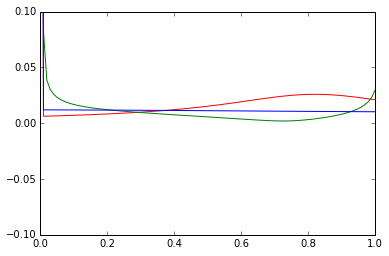

In [100]:
plt.plot(tarray,cox_velocity,c='r')
plt.plot(tarray,mixture_velocity,c='g')
plt.plot(tarray,interpolant_velocity, c='b')
plt.ylim(-.1,.1)